In [1]:
import pandas as pd

telemetry = pd.read_csv('dataset/PdM_telemetry.csv')
errors = pd.read_csv('dataset/PdM_errors.csv')
maint = pd.read_csv('dataset/PdM_maint.csv')
failures = pd.read_csv('dataset/PdM_failures.csv')
machines = pd.read_csv('dataset/PdM_machines.csv')

In [2]:
# format datetime field which comes in as string
telemetry['datetime'] = pd.to_datetime(telemetry['datetime'], format="%Y-%m-%d %H:%M:%S")

print("Total number of telemetry records: %d" % len(telemetry.index))
print(telemetry.head())
telemetry.describe()

Total number of telemetry records: 876100
             datetime  machineID        volt      rotate    pressure  \
0 2015-01-01 06:00:00          1  176.217853  418.504078  113.077935   
1 2015-01-01 07:00:00          1  162.879223  402.747490   95.460525   
2 2015-01-01 08:00:00          1  170.989902  527.349825   75.237905   
3 2015-01-01 09:00:00          1  162.462833  346.149335  109.248561   
4 2015-01-01 10:00:00          1  157.610021  435.376873  111.886648   

   vibration  
0  45.087686  
1  43.413973  
2  34.178847  
3  41.122144  
4  25.990511  


,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


Text(0.5, 0, 'Date')

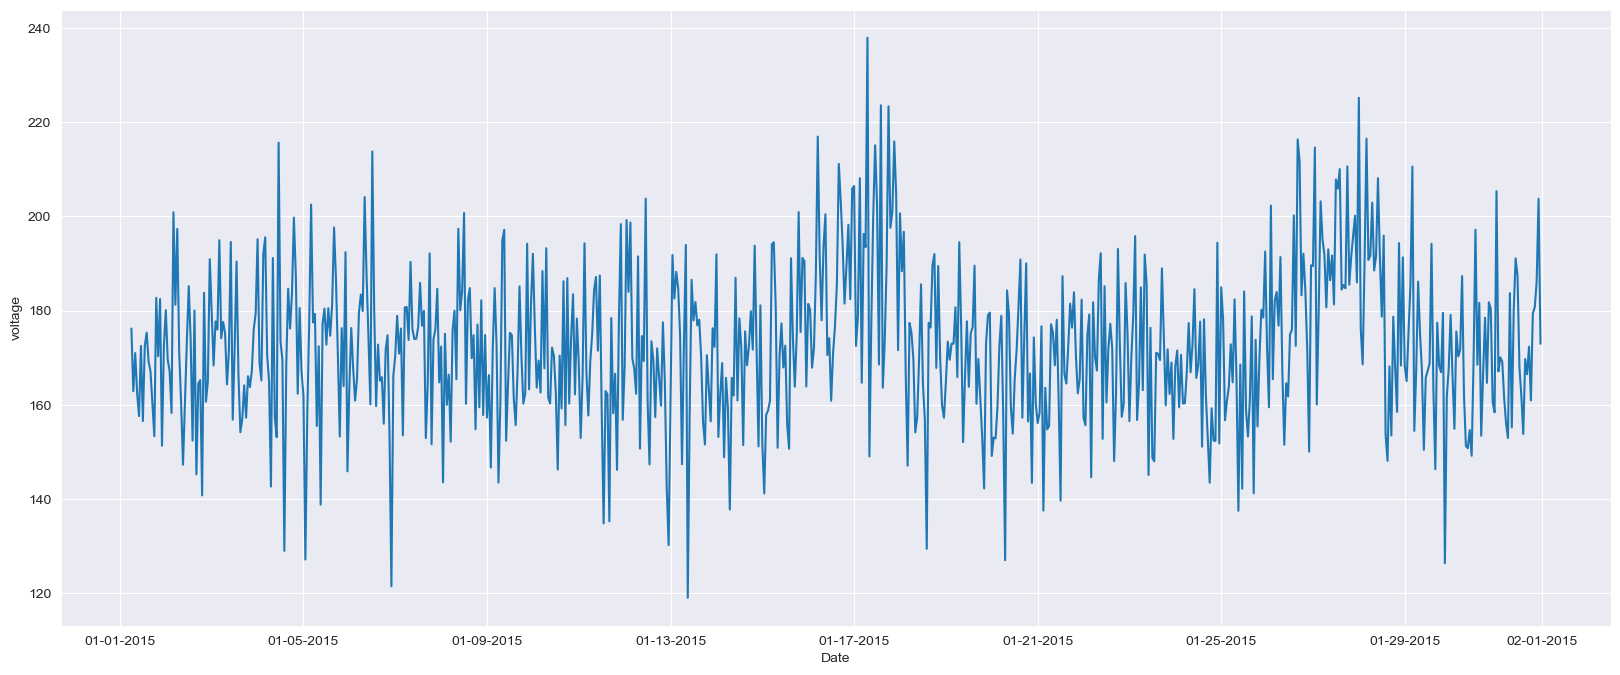

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plot_df = telemetry.loc[(telemetry['machineID'] == 1) & 
                        (telemetry['datetime'] > pd.to_datetime('2015-01-01')) & 
                        (telemetry['datetime'] <pd.to_datetime('2015-02-01')),
                        ['datetime','volt']]
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
plt.plot(plot_df['datetime'], plot_df['volt'])
plt.ylabel('voltage')

# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = '%m-%d-%Y'
plt.xlabel('Date')

In [4]:
# format of datetime field which comes in as string
errors['datetime'] = pd.to_datetime(errors['datetime'],format = '%Y-%m-%d %H:%M:%S')
errors['errorID'] = errors['errorID'].astype('category')
print("Total Number of error records: %d" %len(errors.index))
errors.head()

Total Number of error records: 3919


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


error1    1010
error2     988
error3     838
error4     727
error5     356
Name: errorID, dtype: int64

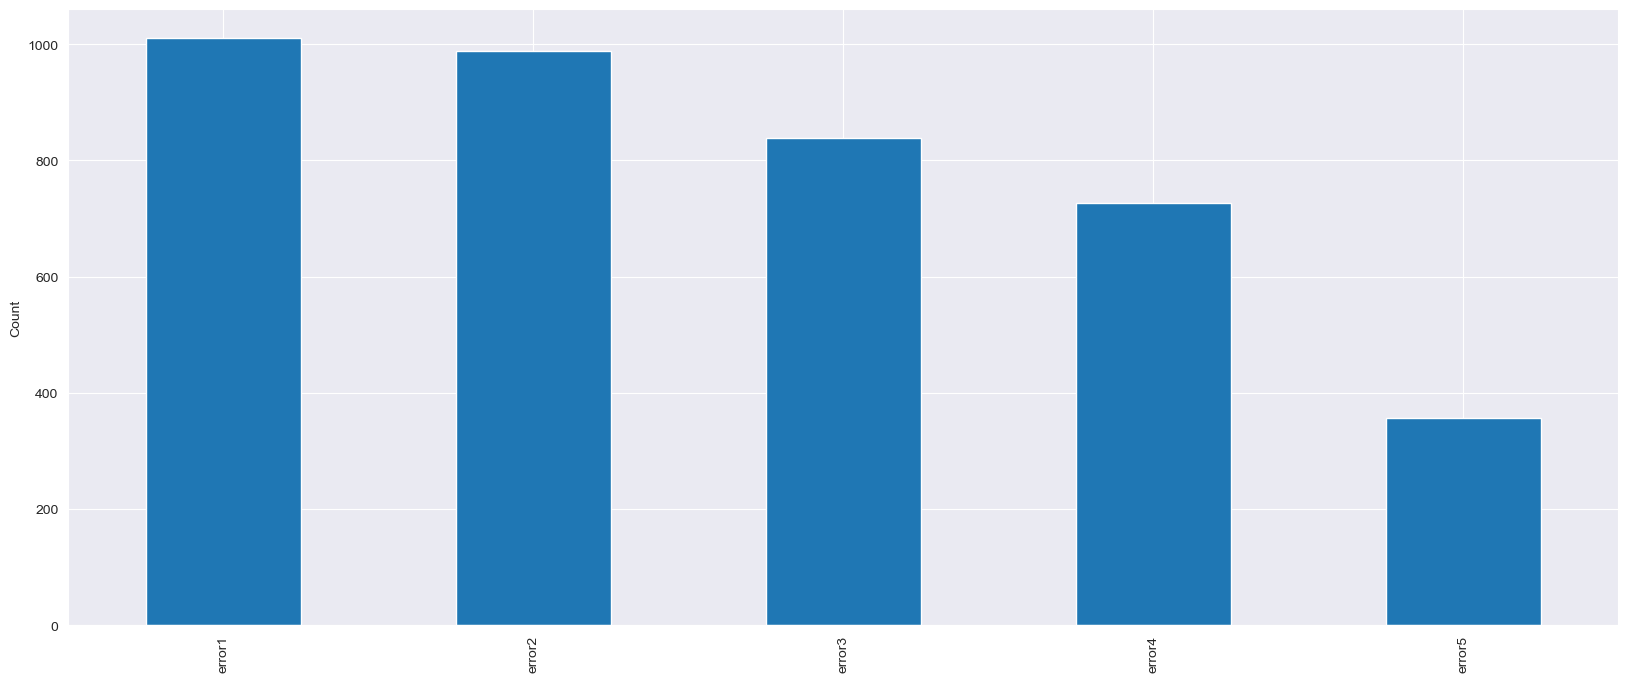

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize=(20, 8))
errors['errorID'].value_counts().plot(kind='bar')
plt.ylabel('Count')
errors['errorID'].value_counts()

In [6]:
maint['datetime'] = pd.to_datetime(maint['datetime'], format='%Y-%m-%d %H:%M:%S')
maint['comp'] = maint['comp'].astype('category')
print("Total Number of maintenance Records: %d" %len(maint.index))
maint.head()

Total Number of maintenance Records: 3286


,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [7]:
machines['model'] = machines['model'].astype('category')

print("Total number of machines: %d" % len(machines.index))
machines.head()

Total number of machines: 100


,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [8]:
# format datetime field which comes in as string
failures['datetime'] = pd.to_datetime(failures['datetime'], format="%Y-%m-%d %H:%M:%S")
failures['failure'] = failures['failure'].astype('category')

print("Total number of failures: %d" % len(failures.index))
failures.head()

Total number of failures: 761


,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [9]:
import pandas as pd

# Calculate mean values for telemetry features
fields = ['volt', 'rotate', 'pressure', 'vibration']
telemetry_mean_3h = pd.DataFrame()  # Initialize an empty DataFrame

for col in fields:
    # Pivot the telemetry DataFrame and calculate mean values resampled every 3 hours
    temp = pd.pivot_table(telemetry,
                          index='datetime',
                          columns='machineID',
                          values=col).resample('3H', closed='left', label='right').mean().unstack()
    telemetry_mean_3h[col + 'mean_3h'] = temp  # Add mean values to the telemetry_mean_3h DataFrame

telemetry_mean_3h.reset_index(inplace=True)  # Reset index

# Display the resulting DataFrame
telemetry_mean_3h.head()


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [10]:
import pandas as pd

# Calculate mean values for telemetry features
fields = ['volt', 'rotate', 'pressure', 'vibration']
telemetry_mean_3h = pd.DataFrame()  # Initialize an empty DataFrame for mean values
telemetry_sd_3h = pd.DataFrame()    # Initialize an empty DataFrame for standard deviation values

for col in fields:
    # Pivot the telemetry DataFrame and calculate mean values resampled every 3 hours
    temp_mean = pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).resample('3H', closed='left', label='right').mean().unstack()
    # Add mean values to the telemetry_mean_3h DataFrame
    telemetry_mean_3h[col + 'mean_3h'] = temp_mean
    
    # Pivot the telemetry DataFrame and calculate standard deviation values resampled every 3 hours
    temp_std = pd.pivot_table(telemetry,
                              index='datetime',
                              columns='machineID',
                              values=col).resample('3H', closed='left', label='right').std().unstack()
    # Add standard deviation values to the telemetry_sd_3h DataFrame
    telemetry_sd_3h[col + 'sd_3h'] = temp_std

# Reset index for both DataFrames
telemetry_mean_3h.reset_index(inplace=True)
telemetry_sd_3h.reset_index(inplace=True)

# Display the resulting DataFrame for mean values
telemetry_mean_3h.head()


,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [11]:
import pandas as pd

# Calculate rolling mean values for telemetry features
fields = ['volt', 'rotate', 'pressure', 'vibration']
telemetry_mean_24h = pd.DataFrame()  # Initialize an empty DataFrame for rolling mean values
telemetry_sd_24h = pd.DataFrame()    # Initialize an empty DataFrame for rolling standard deviation values

for col in fields:
    # Calculate rolling mean values with a window of 24 hours
    temp_mean = pd.pivot_table(telemetry,
                               index='datetime',
                               columns='machineID',
                               values=col).rolling(window=24).mean().resample('3H', closed='left', label='right').first().unstack()
    # Add rolling mean values to the telemetry_mean_24h DataFrame
    telemetry_mean_24h[col + 'mean_24h'] = temp_mean

    # Calculate rolling standard deviation values with a window of 24 hours
    temp_std = pd.pivot_table(telemetry,
                              index='datetime',
                              columns='machineID',
                              values=col).rolling(window=24).std().resample('3H', closed='left', label='right').first().unstack()
    # Add rolling standard deviation values to the telemetry_sd_24h DataFrame
    telemetry_sd_24h[col + 'sd_24h'] = temp_std

# Drop rows with NaN values for 'voltmean_24h' column
telemetry_mean_24h = telemetry_mean_24h.dropna(subset=['voltmean_24h'])

# Drop rows with NaN values for 'voltsd_24h' column
telemetry_sd_24h = telemetry_sd_24h.dropna(subset=['voltsd_24h'])

# Reset index for both DataFrames
telemetry_mean_24h.reset_index(inplace=True)
telemetry_sd_24h.reset_index(inplace=True)

# Display the resulting DataFrame for rolling mean values
telemetry_mean_24h.head()


,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
0,1,2015-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
1,1,2015-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
2,1,2015-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374
3,1,2015-01-02 15:00:00,171.243444,444.233563,96.666060,40.229370
4,1,2015-01-02 18:00:00,170.792486,448.440437,95.766838,40.055214


In [12]:
import pandas as pd

# Concatenate and merge columns from feature sets
telemetry_feat = pd.concat([telemetry_mean_3h,
                            telemetry_sd_3h.iloc[:, 2:6],
                            telemetry_mean_24h.iloc[:, 2:6],
                            telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()

# Display summary statistics of the merged DataFrame
telemetry_feat.describe()


,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000
mean,50.381221,170.780318,446.602212,100.861550,40.384205,13.299403,44.453960,8.885935,4.441080,170.773548,446.611928,100.854764,40.384565,14.918960,49.948561,10.046718,5.002048
std,28.798587,9.502471,33.126940,7.417368,3.477703,6.965654,23.214588,4.656234,2.320225,4.718539,18.077387,4.734045,2.059625,2.260750,7.682497,1.713687,0.799820
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.000000,164.452103,427.552670,96.239742,38.147384,8.028617,26.906792,5.369928,2.684949,168.071038,441.549434,98.668637,39.354145,13.358795,44.669651,8.924373,4.460347
50%,50.000000,170.435415,448.376863,100.236331,40.145780,12.495649,41.792679,8.346061,4.173935,170.211668,449.211753,100.097585,40.072840,14.853989,49.613412,9.921518,4.958578
75%,75.000000,176.614963,468.444030,104.408517,42.227222,17.688117,59.092647,11.790087,5.899534,172.460420,456.368551,101.611001,40.833390,16.394715,54.822682,10.980529,5.484454
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.394833,61.932124,27.664538,103.819404,28.654103,12.325783


In [13]:
errors

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


In [14]:
# create a column for each error type
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']
error_count.head(13)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
5,2015-01-25 15:00:00,1,0,0,0,1,0
6,2015-01-27 04:00:00,1,1,0,0,0,0
7,2015-03-03 22:00:00,1,0,1,0,0,0
8,2015-03-05 06:00:00,1,1,0,0,0,0
9,2015-03-20 18:00:00,1,1,0,0,0,0


In [15]:
# create a column for each error type
error_count = pd.get_dummies(errors.set_index('datetime')).reset_index()
error_count
error_count.columns = ['datetime', 'machineID', 'error1', 'error2', 'error3', 'error4', 'error5']
error_count.head(13)

,datetime,machineID,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,1,0,0,0,0
1,2015-01-03 20:00:00,1,0,0,1,0,0
2,2015-01-04 06:00:00,1,0,0,0,0,1
3,2015-01-10 15:00:00,1,0,0,0,1,0
4,2015-01-22 10:00:00,1,0,0,0,1,0
5,2015-01-25 15:00:00,1,0,0,0,1,0
6,2015-01-27 04:00:00,1,1,0,0,0,0
7,2015-03-03 22:00:00,1,0,1,0,0,0
8,2015-03-05 06:00:00,1,1,0,0,0,0
9,2015-03-20 18:00:00,1,1,0,0,0,0


In [16]:
# combine errors for a given machine in a given hour
error_count = error_count.groupby(['machineID','datetime']).sum().reset_index()
error_count.head(13)

,machineID,datetime,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,1,0,0,0,0
1,1,2015-01-03 20:00:00,0,0,1,0,0
2,1,2015-01-04 06:00:00,0,0,0,0,1
3,1,2015-01-10 15:00:00,0,0,0,1,0
4,1,2015-01-22 10:00:00,0,0,0,1,0
5,1,2015-01-25 15:00:00,0,0,0,1,0
6,1,2015-01-27 04:00:00,1,0,0,0,0
7,1,2015-03-03 22:00:00,0,1,0,0,0
8,1,2015-03-05 06:00:00,1,0,0,0,0
9,1,2015-03-20 18:00:00,1,0,0,0,0


In [17]:
error_count = telemetry[['datetime', 'machineID']].merge(error_count, on=['machineID', 'datetime'], how='left').fillna(0.0)
error_count.describe()

,machineID,error1,error2,error3,error4,error5
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866087,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
import pandas as pd

# Define fields
fields = ['error%d' % i for i in range(1, 6)]

# Initialize a list to store temporary results
temp = []

# Iterate over each error column
for col in fields:
    # Calculate rolling sum with a window of 24 hours, then resample to 3-hour intervals
    temp.append(pd.pivot_table(error_count,
                               index='datetime',
                               columns='machineID',
                               values=col)
                .rolling(window=24)
                .sum()
                .resample('3H', closed='left', label='right')
                .first()
                .unstack())

# Concatenate the temporary results along the column axis
error_count = pd.concat(temp, axis=1)

# Rename columns
error_count.columns = [i + 'count' for i in fields]

# Reset index
error_count.reset_index(inplace=True)

# Drop rows with NaN values
error_count = error_count.dropna()

# Display summary statistics
error_count.describe()


,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


In [19]:
import numpy as np

# create a column for each error type
comp_rep = pd.get_dummies(maint.set_index('datetime')).reset_index()
comp_rep.columns = ['datetime', 'machineID', 'comp1', 'comp2', 'comp3', 'comp4']

# combine repairs for a given machine in a given hour
comp_rep = comp_rep.groupby(['machineID', 'datetime']).sum().reset_index()

# add timepoints where no components were replaced
comp_rep = telemetry[['datetime', 'machineID']].merge(comp_rep,
                                                      on=['datetime', 'machineID'],
                                                      how='outer').fillna(0).sort_values(by=['machineID', 'datetime'])

components = ['comp1', 'comp2', 'comp3', 'comp4']
for comp in components:
    # convert indicator to most recent date of component change
    comp_rep.loc[comp_rep[comp] < 1, comp] = None
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), 'datetime']
    
    # forward-fill the most-recent date of component change
    comp_rep[comp] = comp_rep[comp].fillna(method='ffill')

# remove dates in 2014 (may have NaN or future component change dates)    
comp_rep = comp_rep.loc[comp_rep['datetime'] > pd.to_datetime('2015-01-01')]

# replace dates of most recent component change with days since most recent component change
for comp in components:
    comp_rep[comp] = (comp_rep['datetime'] - comp_rep[comp]) / np.timedelta64(1, 'D')
    
comp_rep.describe()

,machineID,comp1,comp2,comp3,comp4
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,53.525185,51.540806,52.725962,53.834191
std,28.866087,62.491679,59.269254,58.873114,59.707978
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.750000,13.291667,12.125000,13.125000,13.000000
50%,50.500000,32.791667,29.666667,32.291667,32.500000
75%,75.250000,68.708333,66.541667,67.333333,70.458333
max,100.000000,491.958333,348.958333,370.958333,394.958333


In [20]:
telemetry_feat

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502,6.721032,67.849599,18.934956,5.874970,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891,7.596570,50.120452,8.555032,7.662229,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405,10.124584,55.084734,5.909721,5.169304,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739,4.673269,42.047278,4.554047,2.106108,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542,14.752132,47.048609,4.244158,2.207884,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291395,100,2015-10-05 09:00:00,188.267556,407.256175,108.931184,36.553233,9.599915,40.722980,1.639521,5.724500,171.547643,452.351565,101.789714,39.184285,16.429023,62.147934,7.475540,5.448962
291396,100,2015-10-05 12:00:00,167.859576,465.992407,107.953155,42.708899,14.190347,92.277799,9.577243,0.735339,168.806645,459.502212,100.919285,38.150193,17.019808,64.730136,8.961444,5.833191
291397,100,2015-10-05 15:00:00,170.348099,434.234744,104.514343,38.607950,10.232598,49.524471,12.445345,2.596743,169.011763,465.923073,101.568092,39.456302,17.096392,64.718132,9.420879,5.738756
291398,100,2015-10-05 18:00:00,152.265370,459.557611,103.536524,40.718426,6.758667,27.051145,12.824247,2.752883,172.838745,461.095362,101.396728,39.964090,15.119775,65.929509,8.836617,6.139142


In [21]:
final_feat = telemetry_feat.merge(error_count, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(comp_rep, on=['datetime', 'machineID'], how='left')
final_feat = final_feat.merge(machines, on=['machineID'], how='left')

print(final_feat.head())
final_feat.describe()

   machineID            datetime  voltmean_3h  rotatemean_3h  pressuremean_3h  \
0          1 2015-01-01 09:00:00   170.028993     449.533798        94.592122   
1          1 2015-01-01 12:00:00   164.192565     403.949857       105.687417   
2          1 2015-01-01 15:00:00   168.134445     435.781707       107.793709   
3          1 2015-01-01 18:00:00   165.514453     430.472823       101.703289   
4          1 2015-01-01 21:00:00   168.809347     437.111120        90.911060   

   vibrationmean_3h  voltsd_3h  rotatesd_3h  pressuresd_3h  vibrationsd_3h  \
0         40.893502   6.721032    67.849599      18.934956        5.874970   
1         34.255891   7.596570    50.120452       8.555032        7.662229   
2         41.239405  10.124584    55.084734       5.909721        5.169304   
3         40.373739   4.673269    42.047278       4.554047        2.106108   
4         41.738542  14.752132    47.048609       4.244158        2.207884   

   ...  error2count  error3count  error4coun

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,error1count,error2count,error3count,error4count,error5count,comp1,comp2,comp3,comp4,age
count,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,...,290601.000000,290601.000000,290601.000000,290601.000000,290601.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000
mean,50.381221,170.780318,446.602212,100.861550,40.384205,13.299403,44.453960,8.885935,4.441080,170.773548,...,0.027560,0.027058,0.022846,0.019955,0.009780,53.496531,51.414018,52.685370,53.829767,11.345189
std,28.798587,9.502471,33.126940,7.417368,3.477703,6.965654,23.214588,4.656234,2.320225,4.718539,...,0.166026,0.164401,0.151266,0.140998,0.098931,62.539840,59.266808,58.913766,59.744666,5.826348
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,164.452103,427.552670,96.239742,38.147384,8.028617,26.906792,5.369928,2.684949,168.071038,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.250000,12.125000,13.000000,13.000000,7.000000
50%,50.000000,170.435415,448.376863,100.236331,40.145780,12.495649,41.792679,8.346061,4.173935,170.211668,...,0.000000,0.000000,0.000000,0.000000,0.000000,32.750000,29.625000,32.125000,32.500000,12.000000
75%,75.000000,176.614963,468.444030,104.408517,42.227222,17.688117,59.092647,11.790087,5.899534,172.460420,...,0.000000,0.000000,0.000000,0.000000,0.000000,68.625000,66.125000,67.250000,70.500000,16.000000
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,...,2.000000,2.000000,2.000000,2.000000,2.000000,491.875000,348.875000,370.875000,394.875000,20.000000


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\clust

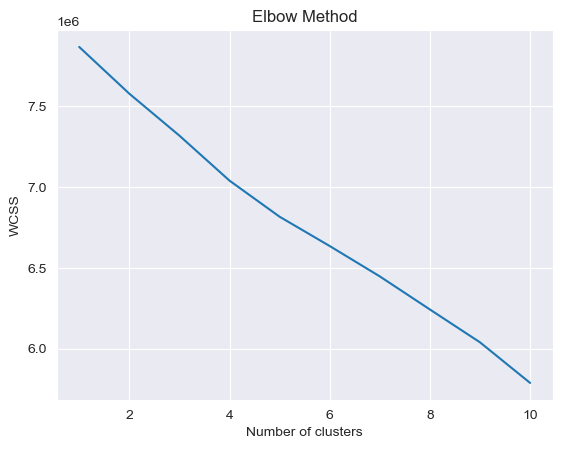

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   machineID  voltmean_3h  rotatemean_3h  pressuremean_3h  vibrationmean_3h  \
0  -0.762160     0.000326       0.019827        -0.001939         -0.011481   
1   0.021661     0.028049      -0.730791         0.031754          0.049662   
2   0.905173    -0.001805       0.013349         0.000702          0.011143   

   voltsd_3h  rotatesd_3h  pressuresd_3h  vibrationsd_3h  voltmean_24h  ...  \
0   0.000150     0.007208      -0.004681        0.000805      0.012669  ...   
1  -0.015644    -0.004301      -0.001026       -0.007600     -0.043801  ...   
2   0.000612    -0.008354       0.005618       -0.000573     -0.012852  ...   

   error1count  error2count  error3count  error4count  error5count     comp1  \
0    -0.008213    -0.040186    -0.151011    -0.007902    -0.037228  0.155613   
1     0.056912     1.845492     6.542505     0.062435     0.151841  0.073131   
2     0.006890    -0.045464    -0.151011     0.006241     0.036595 -0.188731   

      comp2     comp3     comp4       age  
0

In [22]:
from sklearn.cluster import KMeans
import pandas as pd

# Assuming final_feat is prepared with all relevant features without labels

# Preprocessing: handle missing values
final_feat.fillna(method='bfill', inplace=True)  # Fill missing values using backward fill method
final_feat.fillna(method='ffill', inplace=True)  # Fill remaining missing values using forward fill method

# Drop non-numeric columns
final_feat_numeric = final_feat.select_dtypes(include='number')

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final_feat_normalized = scaler.fit_transform(final_feat_numeric)

# Determine the optimal number of clusters using the Elbow method
import matplotlib.pyplot as plt
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(final_feat_normalized)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# From the Elbow Method plot, choose the optimal number of clusters

# Apply KMeans clustering
num_clusters = 3  # Choose the optimal number of clusters based on the Elbow Method
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
final_feat['cluster'] = kmeans.fit_predict(final_feat_normalized)

# Analyze clusters to identify patterns indicative of potential failure
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=final_feat_numeric.columns)
print(cluster_centers)

# You can further analyze the clusters to identify patterns that might indicate potential failures


In [23]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Davies-Bouldin index
db_index = davies_bouldin_score(final_feat_normalized, final_feat['cluster'])
print("Davies-Bouldin Index:", db_index)

# Calinski-Harabasz index
ch_index = calinski_harabasz_score(final_feat_normalized, final_feat['cluster'])
print("Calinski-Harabasz Index:", ch_index)


Davies-Bouldin Index: 3.9748313296977216
Calinski-Harabasz Index: 10913.438470087114


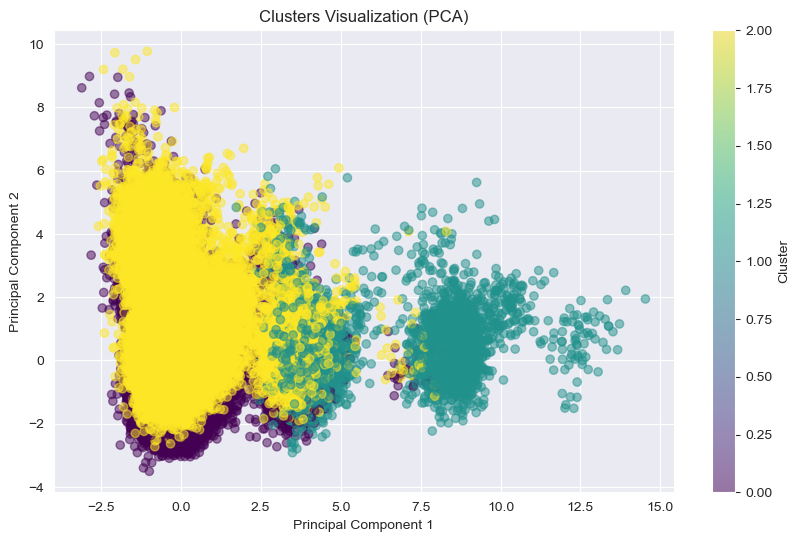

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
final_feat_pca = pca.fit_transform(final_feat_normalized)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(final_feat_pca[:, 0], final_feat_pca[:, 1], c=final_feat['cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


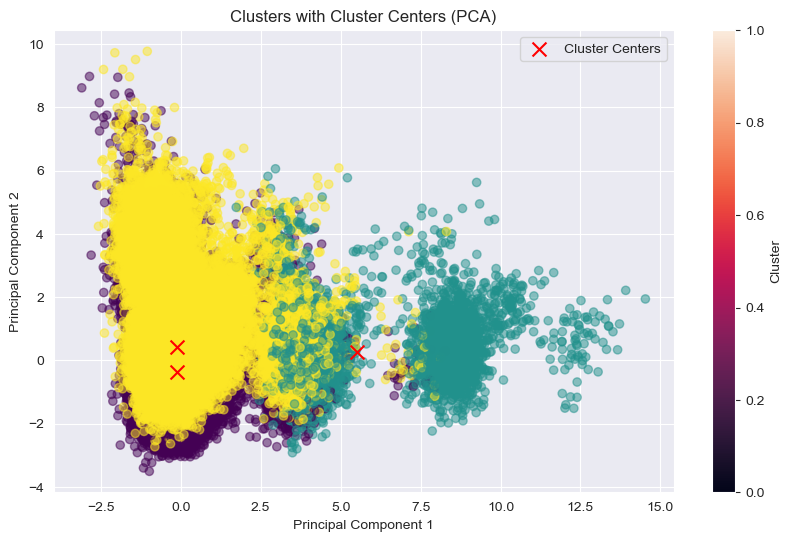

In [25]:
# Transform the cluster centers to the PCA space
cluster_centers_pca = pca.transform(kmeans.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(final_feat_pca[:, 0], final_feat_pca[:, 1], c=final_feat['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], marker='x', s=100, c='red', label='Cluster Centers')
plt.title('Clusters with Cluster Centers (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


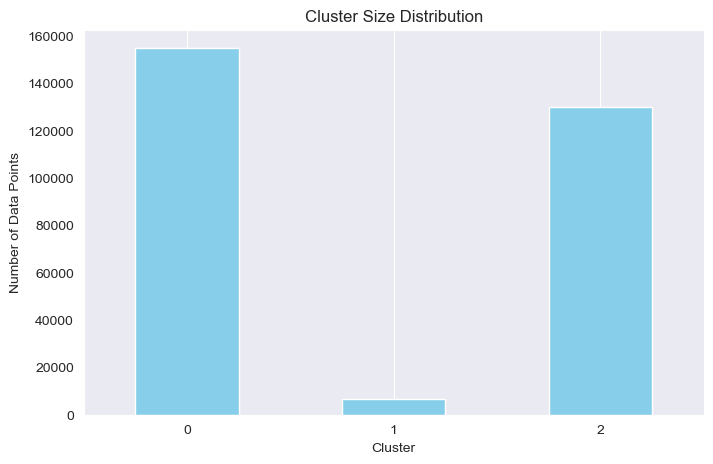

In [26]:
# Count the number of data points in each cluster
cluster_counts = final_feat['cluster'].value_counts().sort_index()

# Plot cluster size distribution
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


Index(['machineID', 'datetime', 'voltmean_3h', 'rotatemean_3h',
       'pressuremean_3h', 'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h',
       'pressuresd_3h', 'vibrationsd_3h', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h', 'error1count', 'error2count',
       'error3count', 'error4count', 'error5count', 'comp1', 'comp2', 'comp3',
       'comp4', 'model', 'age', 'cluster'],
      dtype='object')


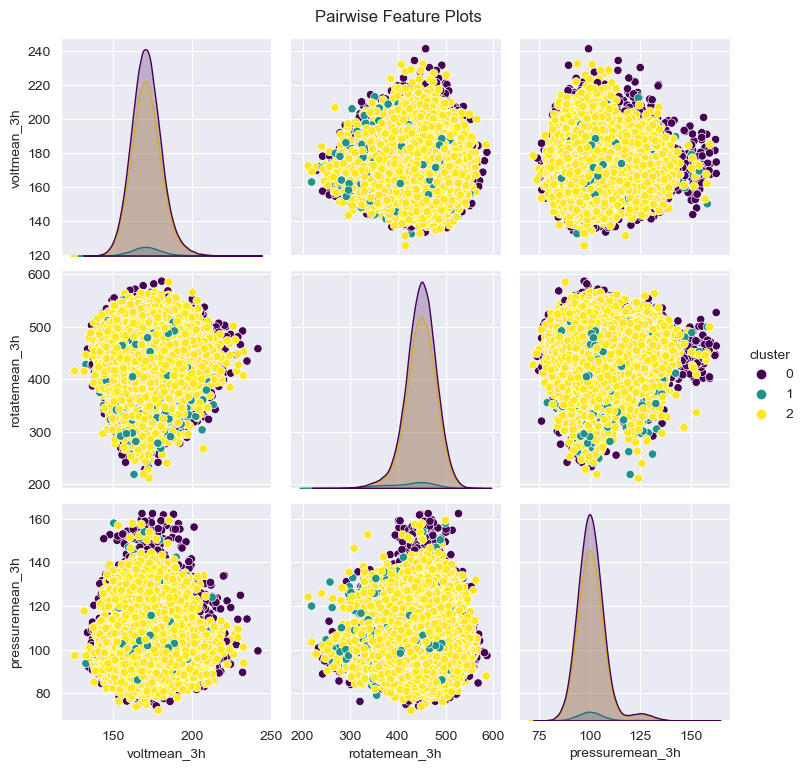

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Display the columns to identify suitable features
print(final_feat.columns)

# Select a subset of real feature names for pairwise plots
selected_features = ['voltmean_3h', 'rotatemean_3h', 'pressuremean_3h']  # Replace with actual feature names

# Pairwise plot
sns.pairplot(final_feat[selected_features + ['cluster']], hue='cluster', palette='viridis')
plt.suptitle('Pairwise Feature Plots', y=1.02)
plt.show()



In [28]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_feat is already prepared with all relevant features without labels

# Preprocessing: handle missing values
final_feat.fillna(method='bfill', inplace=True)  # Fill missing values using backward fill method
final_feat.fillna(method='ffill', inplace=True)  # Fill remaining missing values using forward fill method

# Drop non-numeric columns
final_feat_numeric = final_feat.select_dtypes(include='number')

# Normalize the data
scaler = StandardScaler()
final_feat_normalized = scaler.fit_transform(final_feat_numeric)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Adjusted parameters
final_feat['cluster'] = dbscan.fit_predict(final_feat_normalized)

# Number of clusters (excluding noise)
num_clusters = len(set(final_feat['cluster'])) - (1 if -1 in final_feat['cluster'] else 0)
print("Number of clusters:", num_clusters)

# Number of noise points
num_noise = list(final_feat['cluster']).count(-1)
print("Number of noise points:", num_noise)

# Visualize clusters using PCA
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
final_feat_pca = pca.fit_transform(final_feat_normalized)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_feat_pca[:, 0], y=final_feat_pca[:, 1], hue=final_feat['cluster'], palette='viridis', alpha=0.5)
plt.title('DBSCAN Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_feat is already prepared with all relevant features without labels

# Preprocessing: handle missing values
final_feat.fillna(method='bfill', inplace=True)  # Fill missing values using backward fill method
final_feat.fillna(method='ffill', inplace=True)  # Fill remaining missing values using forward fill method

# Drop non-numeric columns
final_feat_numeric = final_feat.select_dtypes(include='number')

# Normalize the data
scaler = StandardScaler()
final_feat_normalized = scaler.fit_transform(final_feat_numeric)

# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # You can choose the number of components
final_feat['cluster'] = gmm.fit_predict(final_feat_normalized)

# Visualize clusters using PCA
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
final_feat_pca = pca.fit_transform(final_feat_normalized)

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_feat_pca[:, 0], y=final_feat_pca[:, 1], hue=final_feat['cluster'], palette='viridis', alpha=0.5)
plt.title('Gaussian Mixture Model Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [ ]:
# Assuming final_feat is already prepared with all relevant features without labels

# Preprocessing: handle missing values
final_feat.fillna(method='bfill', inplace=True)  # Fill missing values using backward fill method
final_feat.fillna(method='ffill', inplace=True)  # Fill remaining missing values using forward fill method

# Drop non-numeric columns
final_feat_numeric = final_feat.select_dtypes(include='number')


In [ ]:
# Normalize the data
scaler = StandardScaler()
final_feat_normalized = scaler.fit_transform(final_feat_numeric)


In [ ]:
# Apply Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # You can choose the number of components
final_feat['cluster'] = gmm.fit_predict(final_feat_normalized)


In [ ]:
# Visualize clusters using PCA
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
final_feat_pca = pca.fit_transform(final_feat_normalized)


In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=final_feat_pca[:, 0], y=final_feat_pca[:, 1], hue=final_feat['cluster'], palette='viridis', alpha=0.5)
plt.title('Gaussian Mixture Model Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


Final Output

C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   machineID  voltmean_3h  rotatemean_3h  pressuremean_3h  vibrationmean_3h  \
0  -0.761100     0.000299       0.002412        -0.001460         -0.009825   
1   0.907555    -0.000356      -0.002876         0.001741          0.011715   

   voltsd_3h  rotatesd_3h  pressuresd_3h  vibrationsd_3h  voltmean_24h  ...  \
0  -0.000107     0.007103      -0.004456        0.000556      0.009487  ...   
1   0.000127    -0.008470       0.005314       -0.000663     -0.011313  ...   

   error3count  error4count  error5count     comp1     comp2     comp3  \
0     0.003361    -0.005891    -0.030976  0.157772 -0.048137  0.101478   
1    -0.004008     0.007025     0.036937 -0.188131  0.057400 -0.121005   

      comp4       age   cluster  failure  
0 -0.168886 -0.195529 -0.905299      0.0  
1  0.201384  0.233154  1.079502      0.0  

[2 rows x 29 columns]
Davies-Bouldin Index: 3.5950241733760127
Calinski-Harabasz Index: 19980.60322761817


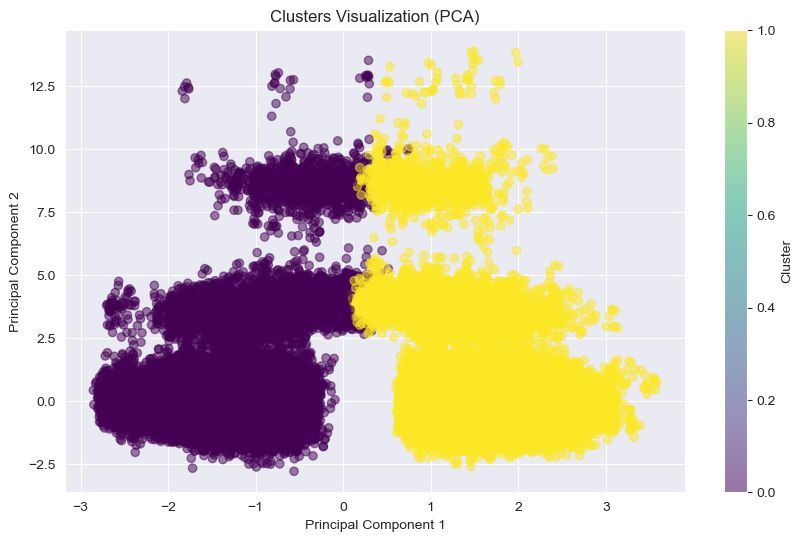

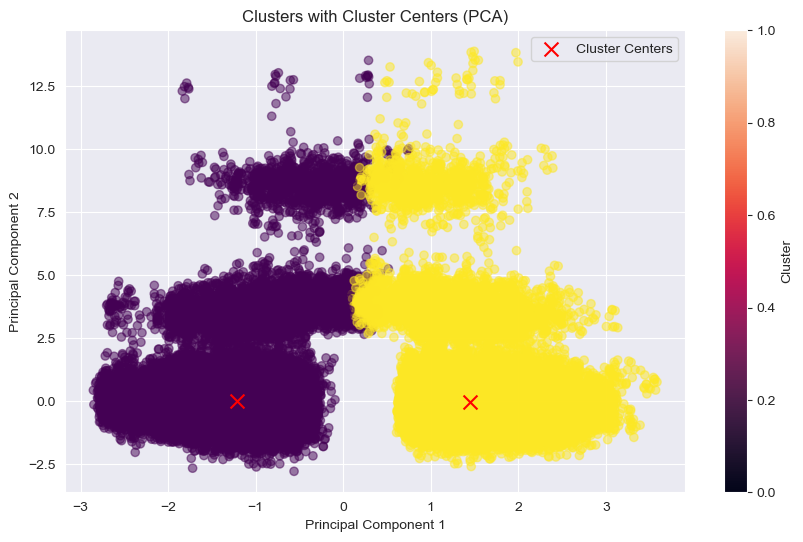

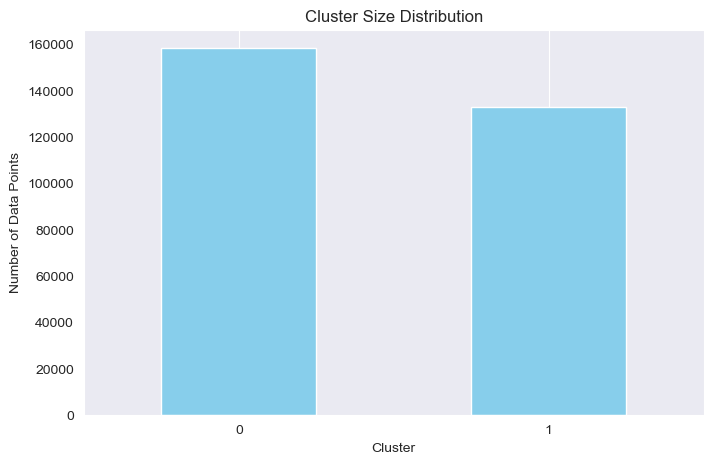

Index(['machineID', 'datetime', 'voltmean_3h', 'rotatemean_3h',
       'pressuremean_3h', 'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h',
       'pressuresd_3h', 'vibrationsd_3h', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h', 'error1count', 'error2count',
       'error3count', 'error4count', 'error5count', 'comp1', 'comp2', 'comp3',
       'comp4', 'model', 'age', 'cluster', 'failure'],
      dtype='object')


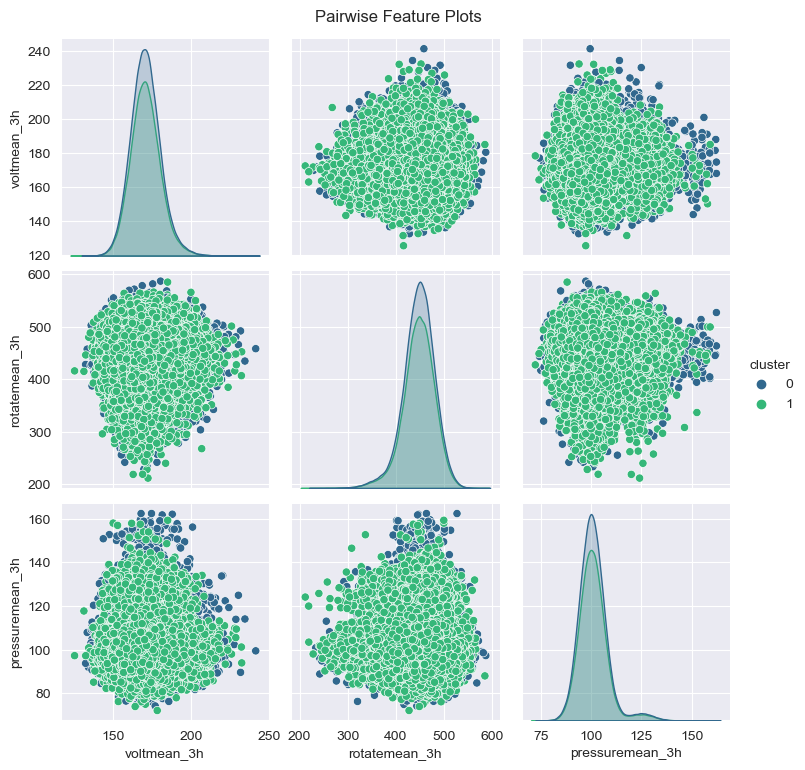

Cluster Centers:
   machineID  voltmean_3h  rotatemean_3h  pressuremean_3h  vibrationmean_3h  \
0  -0.761100     0.000299       0.002412        -0.001460         -0.009825   
1   0.907555    -0.000356      -0.002876         0.001741          0.011715   

   voltsd_3h  rotatesd_3h  pressuresd_3h  vibrationsd_3h  voltmean_24h  ...  \
0  -0.000107     0.007103      -0.004456        0.000556      0.009487  ...   
1   0.000127    -0.008470       0.005314       -0.000663     -0.011313  ...   

   error3count  error4count  error5count     comp1     comp2     comp3  \
0     0.003361    -0.005891    -0.030976  0.157772 -0.048137  0.101478   
1    -0.004008     0.007025     0.036937 -0.188131  0.057400 -0.121005   

      comp4       age   cluster  failure  
0 -0.168886 -0.195529 -0.905299      0.0  
1  0.201384  0.233154  1.079502      0.0  

[2 rows x 29 columns]
Failure counts:
0    158349
1    132952
Name: failure, dtype: int64


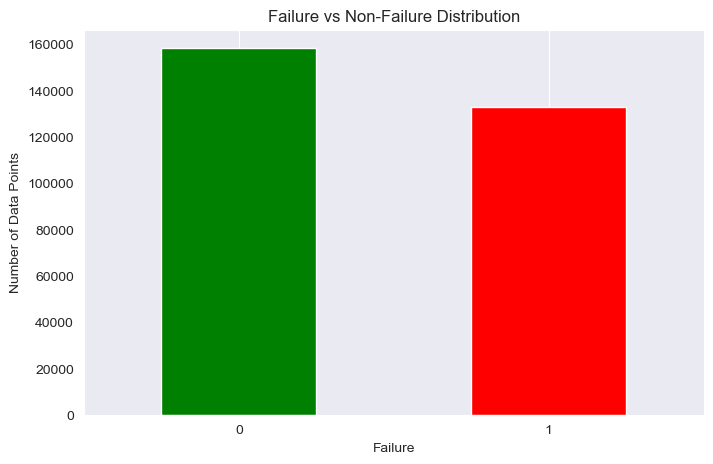

In [32]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Assuming final_feat is prepared with all relevant features without labels

# Preprocessing: handle missing values
final_feat.fillna(method='bfill', inplace=True)
final_feat.fillna(method='ffill', inplace=True)

# Drop non-numeric columns
final_feat_numeric = final_feat.select_dtypes(include='number')

# Normalize the data
scaler = StandardScaler()
final_feat_normalized = scaler.fit_transform(final_feat_numeric)

# Apply KMeans clustering with k=2 (failure and non-failure)
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
final_feat['cluster'] = kmeans.fit_predict(final_feat_normalized)

# Analyze clusters to identify patterns indicative of potential failure
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=final_feat_numeric.columns)
print(cluster_centers)

# Davies-Bouldin and Calinski-Harabasz indices
db_index = davies_bouldin_score(final_feat_normalized, final_feat['cluster'])
ch_index = calinski_harabasz_score(final_feat_normalized, final_feat['cluster'])
print("Davies-Bouldin Index:", db_index)
print("Calinski-Harabasz Index:", ch_index)

# PCA for visualization
pca = PCA(n_components=2)
final_feat_pca = pca.fit_transform(final_feat_normalized)

plt.figure(figsize=(10, 6))
plt.scatter(final_feat_pca[:, 0], final_feat_pca[:, 1], c=final_feat['cluster'], cmap='viridis', alpha=0.5)
plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

cluster_centers_pca = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(10, 6))
plt.scatter(final_feat_pca[:, 0], final_feat_pca[:, 1], c=final_feat['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], marker='x', s=100, c='red', label='Cluster Centers')
plt.title('Clusters with Cluster Centers (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.legend()
plt.grid(True)
plt.show()

# Count the number of data points in each cluster
cluster_counts = final_feat['cluster'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# Display the columns to identify suitable features
print(final_feat.columns)
selected_features = ['voltmean_3h', 'rotatemean_3h', 'pressuremean_3h']  # Replace with actual feature names
sns.pairplot(final_feat[selected_features + ['cluster']], hue='cluster', palette='viridis')
plt.suptitle('Pairwise Feature Plots', y=1.02)
plt.show()

# Assign failure labels based on clusters (assuming cluster 1 is failure)
final_feat['failure'] = final_feat['cluster'].apply(lambda x: 1 if x == 1 else 0)

# Display the cluster centers for reference
print("Cluster Centers:")
print(cluster_centers)

# Display the count of failures and non-failures
failure_counts = final_feat['failure'].value_counts()
print("Failure counts:")
print(failure_counts)

# Visualize the distribution of failures across clusters
plt.figure(figsize=(8, 5))
failure_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Failure vs Non-Failure Distribution')
plt.xlabel('Failure')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
